# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
# import chardet

# with open('PoliceShootingsUS.csv', 'rb') as f:
#     content = f.read()
#     result = chardet.detect(content)
# result

In [2]:
from urllib import request
from zipfile import ZipFile

def download(file, url):
    res = request.urlopen(url)
    with open(file,'wb') as fp:
        fp.write(res.read())   

In [3]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data'

download(file_name, file_url)

In [4]:
def unzip(file_name, path='./'):
    with ZipFile(file_name, 'r') as zip: 
        zip.printdir() 
        zip.extractall(path = path) 

In [5]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


In [6]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 24CF-DE8E

 Directory of C:\Users\Achal Gupta\Desktop\Arushi\Data601\Data_601\Week06

03/10/2022  10:49 PM    <DIR>          .
03/10/2022  10:49 PM    <DIR>          ..
03/10/2022  08:38 PM    <DIR>          .ipynb_checkpoints
03/10/2022  08:19 PM             2,144 hw-06.ipynb
03/10/2022  10:49 PM            65,861 lab_data
03/10/2022  10:49 PM           227,653 PoliceShootingsUS.csv
03/10/2022  10:49 PM             7,015 volunteers.txt
03/10/2022  10:42 PM            40,201 week06_lab.ipynb
03/10/2022  08:37 PM    <DIR>          __MACOSX
               5 File(s)        342,874 bytes
               4 Dir(s)  180,409,397,248 bytes free


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('PoliceShootingsUS.csv', encoding = 'latin1')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
## How many offenders are older than 55?

count = 0

for ele in df.index:
    if df['age'][ele] > 55:
        count = count + 1
print(count)


235


* What's the age distribution?

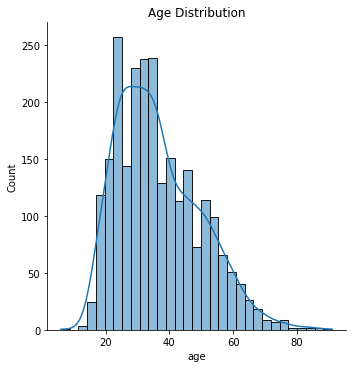

In [10]:
## Your code is here

import seaborn as sns

plot = sns.displot(data = df, x = 'age', kde = True)
plot.set(title= 'Age Distribution')

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [11]:
## Your code is here

first=[]
last= []
state_list=[]

with open('volunteers.txt', 'r') as text_file:
    lines = text_file.readlines()
    
    for line in lines:
        line = line.replace("(", ',')
        line = line.split(',')
        
        # Extracting first name
        fn = line[0]
        fn = fn.split('[')[1]
        first.append(fn)
        
        # Extracting last name
        ln = line[1]
        ln = ln.split(']')[0]
        ln= ln.replace(' ','')
        last.append(ln)
        
        # Extracting state
        state = line[2]
        state = state.split(')')[0]
        state_list.append(state)
        
    data = pd.DataFrame()
    data['Name'] = first
    data['Lastname']= last
    data['State']=state_list

data

,Name,Lastname,State
0,Harding,Christine,Virginia
1,Davis,Kimberly,New York
2,Ingram,Rachel,Louisiana
3,Walker,Richard,Oregon
4,Barnes,Francisco,Virginia
...,...,...,...
95,Smith,Kevin,North Dakota
96,Moore,Mark,Alaska
97,Landry,Jennifer,Wyoming
98,Phillips,Lori,Arkansas
